In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#os interface libimport
import os
import glob
from pathlib import Path

#audio processing libimport
import librosa
import librosa.display
import IPython
from IPython.display import Audio
from scipy.io.wavfile import read, write

In [2]:
#TF Imports; Helpers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import sklearn

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model, save_model

In [4]:
import os

input_folder = '/Users/priyanshityagi/Documents/Emotion_Recog/TESS Toronto emotional speech set data/'

# Check if the input folder exists
if os.path.exists(input_folder):
    # List contents of the input folder
    input_contents = os.listdir(input_folder)
    print("Contents of '/Users/priyanshityagi/Documents/Emotion_Recog/TESS Toronto emotional speech set data/':", input_contents)
    # If 'toronto-emotional-speech-set-tess' is in the contents, set the path
    if 'toronto-emotional-speech-set-tess' in input_contents:
        Main_WAV_Path = os.path.join(input_folder, 'toronto-emotional-speech-set-tess', 'TESS Toronto emotional speech set data')
        print("Main WAV Path:", Main_WAV_Path)
    else:
        print("Error: 'toronto-emotional-speech-set-tess' folder not found.")
else:
    print("Error: 'Users/AASAAN SUPPORT/Desktop/MP/TESS Toronto emotional speech set data/' folder not found.")
Main_WAV_Path = Path('/Users/priyanshityagi/Documents/Emotion_Recog/TESS Toronto emotional speech set data')

Contents of '/Users/priyanshityagi/Documents/Emotion_Recog/TESS Toronto emotional speech set data/': ['YAF_disgust', 'OAF_Pleasant_surprise', '.DS_Store', 'OAF_happy', 'YAF_sad', 'YAF_happy', 'YAF_neutral', 'OAF_Fear', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_fear', 'OAF_neutral', 'OAF_disgust', 'YAF_angry', 'OAF_Sad']
Error: 'toronto-emotional-speech-set-tess' folder not found.


In [5]:
Wav_Path = list(Main_WAV_Path.glob(r'**/*.wav'))

In [6]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], Wav_Path))

In [8]:
Wav_Path_Series = pd.Series(Wav_Path, name='WAV').astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels, name='EMOTION')

In [9]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series], axis=1)
Main_Wav_Data.head(5)

,WAV,EMOTION
0,/Users/priyanshityagi/Documents/Emotion_Recog/...,YAF_disgust
1,/Users/priyanshityagi/Documents/Emotion_Recog/...,YAF_disgust
2,/Users/priyanshityagi/Documents/Emotion_Recog/...,YAF_disgust
3,/Users/priyanshityagi/Documents/Emotion_Recog/...,YAF_disgust
4,/Users/priyanshityagi/Documents/Emotion_Recog/...,YAF_disgust


In [10]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)
Main_Wav_Data.head(5)

,WAV,EMOTION
0,/Users/priyanshityagi/Documents/Emotion_Recog/...,OAF_neutral
1,/Users/priyanshityagi/Documents/Emotion_Recog/...,YAF_neutral
2,/Users/priyanshityagi/Documents/Emotion_Recog/...,OAF_Pleasant_surprise
3,/Users/priyanshityagi/Documents/Emotion_Recog/...,OAF_Pleasant_surprise
4,/Users/priyanshityagi/Documents/Emotion_Recog/...,YAF_pleasant_surprised


In [11]:
rate,speech = read(Main_Wav_Data['WAV'][2342])
print(Main_Wav_Data['EMOTION'][2342])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_fear
(38021,)
int16
24414


In [12]:
rate,speech = read(Main_Wav_Data['WAV'][10])
print(Main_Wav_Data['EMOTION'][10])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Sad
(61736,)
int16
24414


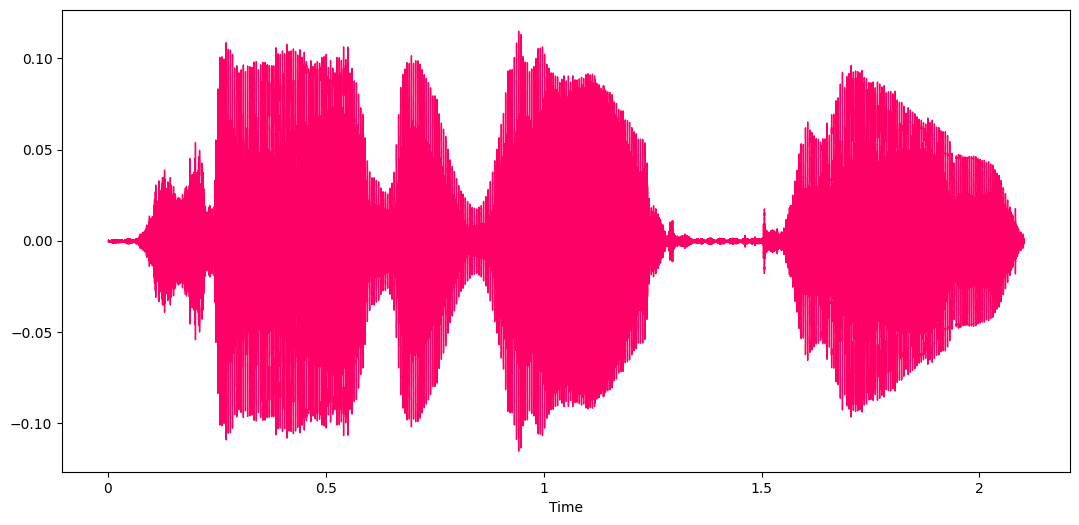

In [13]:
import librosa
figure = plt.figure(figsize=(13,6))
audio_speech,rate = librosa.load(Main_Wav_Data['WAV'][158])
librosa.display.waveshow(audio_speech, sr=rate, color = '#ff0066')

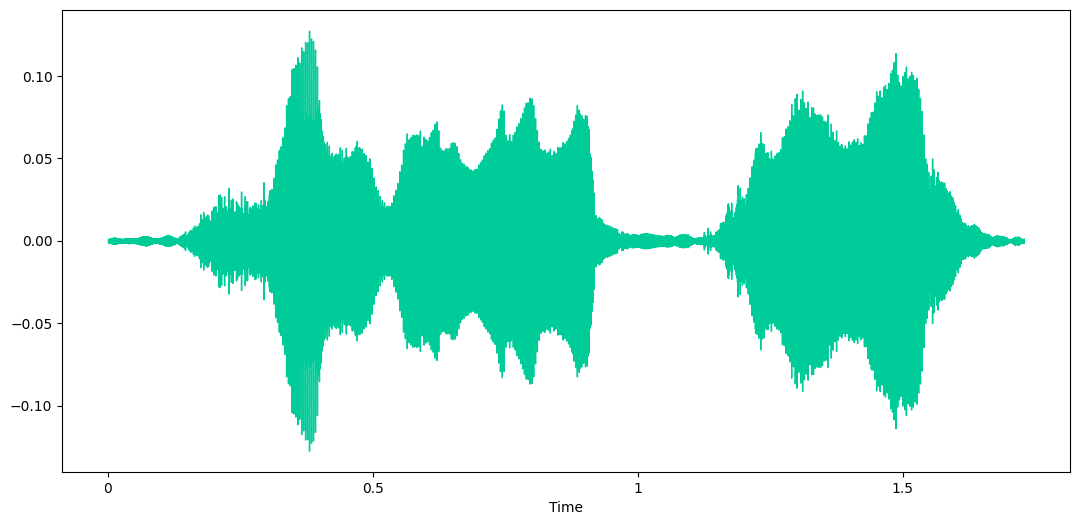

In [14]:
figure = plt.figure(figsize=(13,6))
audio_speech,rate = librosa.load(Main_Wav_Data['WAV'][78])
librosa.display.waveshow(audio_speech, sr=rate, color = '#00cc99')

Noise:

In [15]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    return data

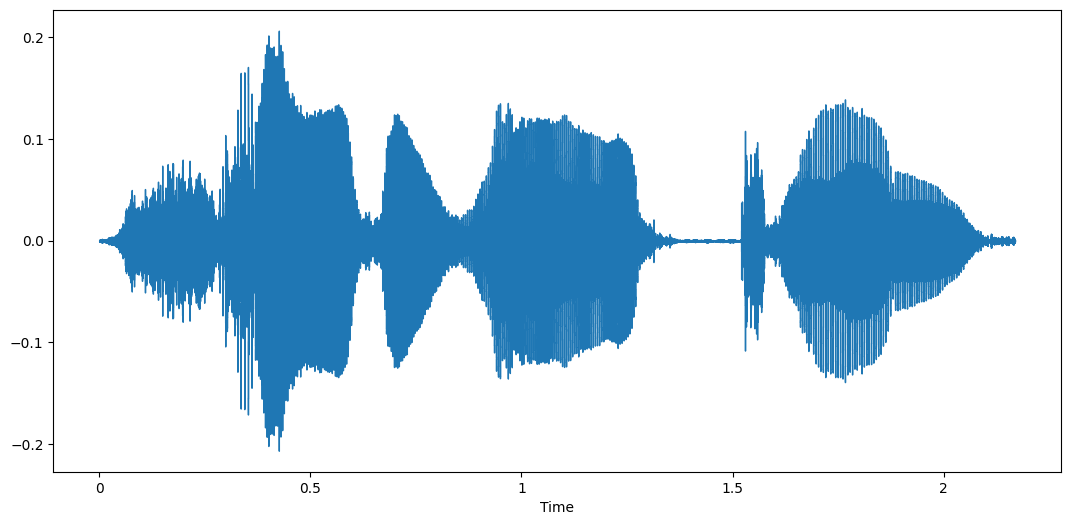

In [16]:
figure = plt.figure(figsize=(13,6))

audio_speech,sample_rate = librosa.load(Main_Wav_Data['WAV'][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveshow(noise_injection, sr=sample_rate)

Stretch:

In [17]:
def stretch_process(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

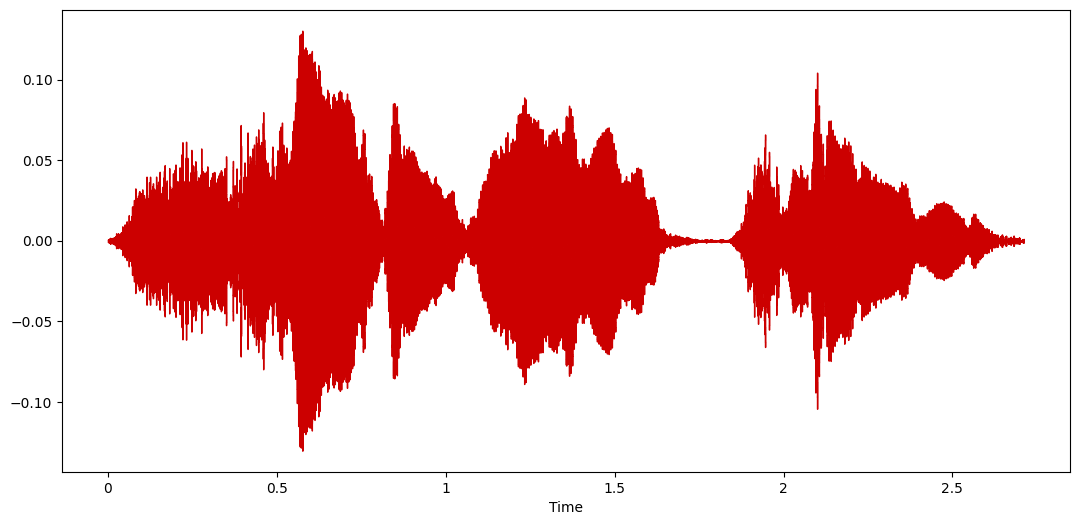

In [18]:
figure = plt.figure(figsize=(13,6))

audio_speech,sample_rate = librosa.load(Main_Wav_Data['WAV'][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveshow(stretching_audio, sr=sample_rate, color='#cc0000')

Shifting:

In [19]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

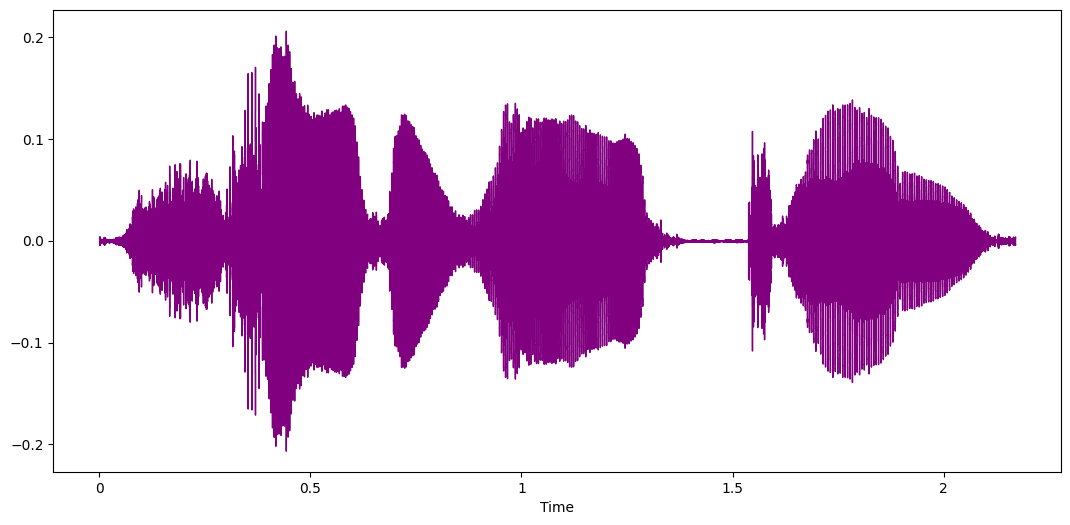

In [20]:
figure = plt.figure(figsize=(13,6))

audio_speech,sample_rate = librosa.load(Main_Wav_Data['WAV'][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveshow(shifting_audio, sr=sample_rate, color='purple')

Pitch:

In [21]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

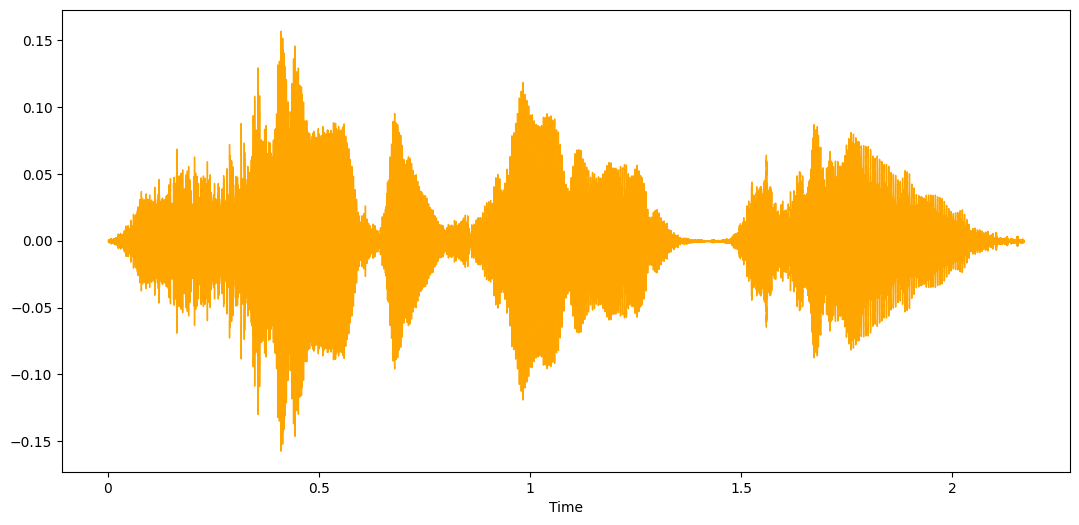

In [22]:
figure = plt.figure(figsize=(13,6))

audio_speech,sample_rate = librosa.load(Main_Wav_Data['WAV'][2000])

pitch_audio = pitch_process(audio_speech, sample_rate)
librosa.display.waveshow(pitch_audio, sr=sample_rate, color='orange')

In [23]:
# Importing 1 file
y, sr = librosa.load(Main_Wav_Data['WAV'][2000])

print(y)
print(np.shape(y))
print(sr)

# Verify length of the audio
print(np.shape(y)[0]/sr)

[9.7201148e-05 4.7322069e-04 1.2517789e-04 ... 7.4739801e-05 3.7380323e-06
 8.0802274e-05]
(47832,)
22050
2.169251700680272


In [24]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print(audio_file)
print(np.shape(audio_file))

[9.7201148e-05 4.7322069e-04 1.2517789e-04 ... 7.4739801e-05 3.7380323e-06
 8.0802274e-05]
(47832,)


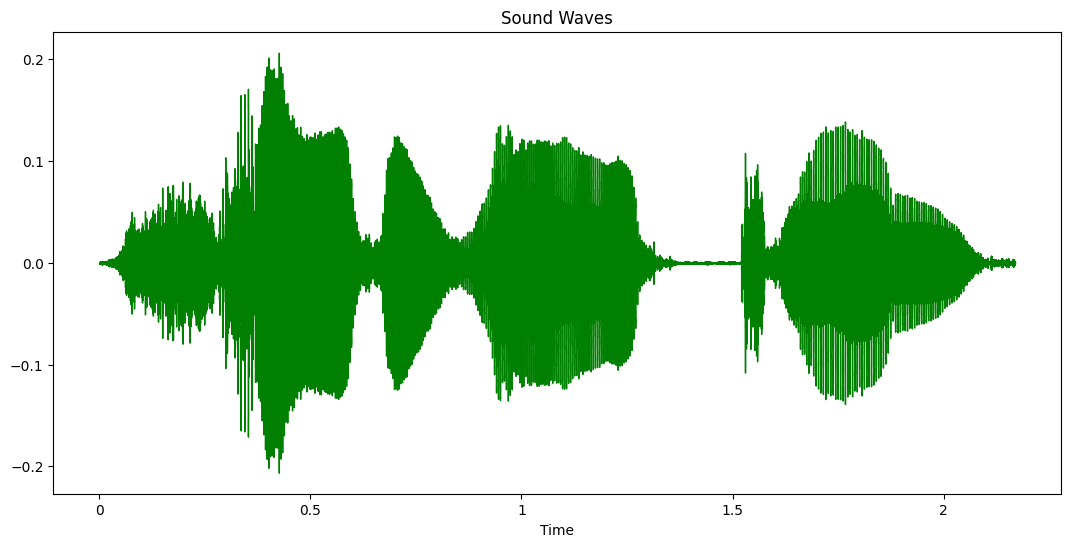

In [25]:
plt.figure(figsize = (13, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = 'green');
plt.title('Sound Waves');

Shape of D object: (1025, 94)


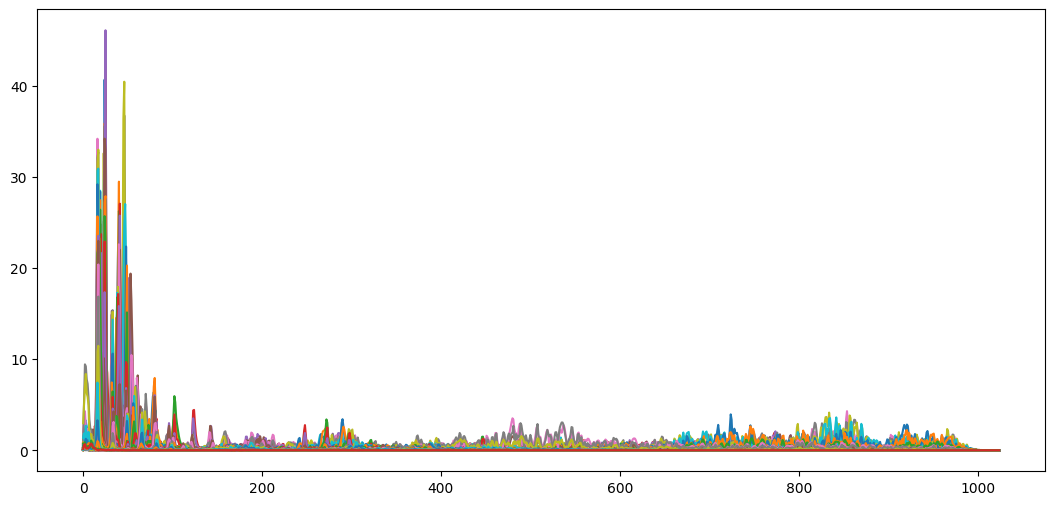

In [26]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

plt.figure(figsize = (13, 6));
plt.plot(D);

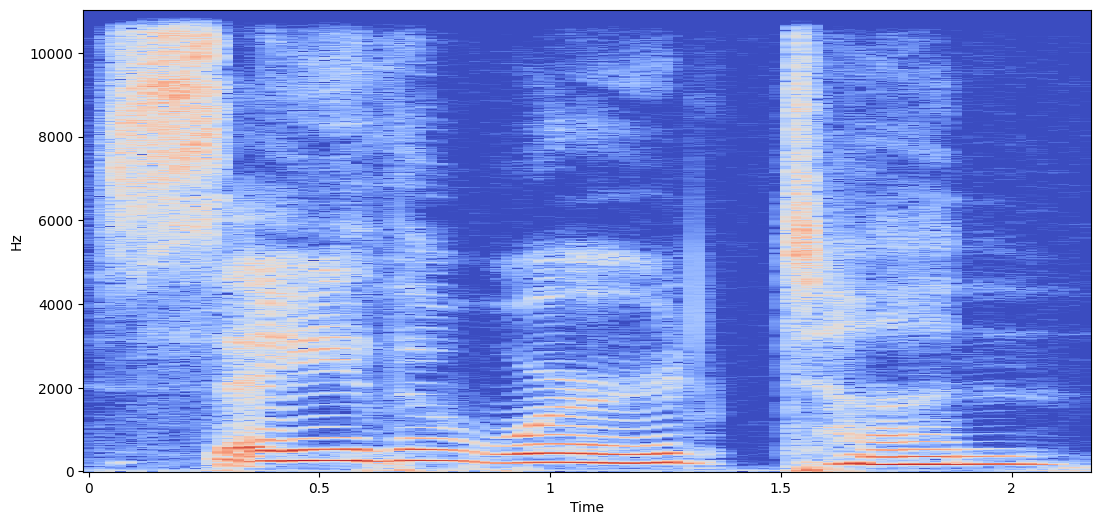

In [27]:
figure = plt.figure(figsize=(13,6))

audio_speech,rate = librosa.load(Main_Wav_Data['WAV'][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio, sr=rate, x_axis='time', y_axis='hz')

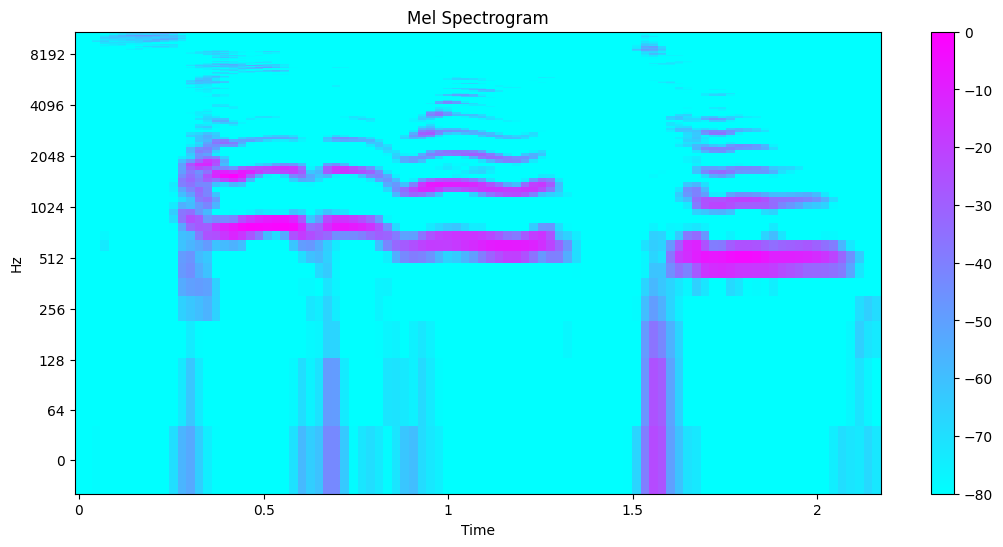

In [28]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (13, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar()
plt.title('Mel Spectrogram');

In [29]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

6176


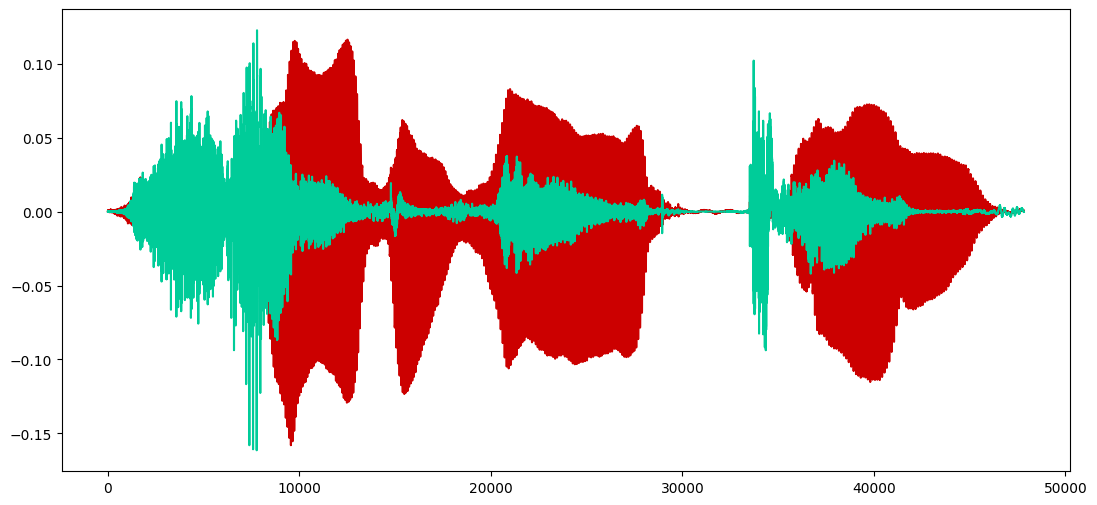

In [30]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (13, 6))
plt.plot(y_harm, color = '#cc0000');
plt.plot(y_perc, color = '#00cc99');

In [31]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

array([103.359375])

In [33]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

Centroids: [4338.13858799 5680.63992964 6913.96233057 7382.62170845 7646.64805939
 7803.47487715 8006.53498873 8095.48184348 8109.95134394 8064.15364837
 8055.27543949 7643.90220852 5262.42884312 2340.60001891 1681.157574
 1745.02314133 1951.67130451 2034.83837974 1835.02477759 1690.35715058
 1904.10532695 2061.32255433 2178.91475612 2154.54657568 1921.97864856
 1633.96867176 1525.10968745 2027.33368819 2137.69113276 1595.49800298
 1395.67322167 1343.51954689 1122.04164335  931.10988354  775.75158736
  680.31194656  680.40760987  688.70334059  756.51857125  793.9637225
  827.11618954  942.51792341 1128.02815299 1276.22173223 1244.23387468
 1225.20640955 1298.56593647 1282.19640248 1264.9958435  1213.76388821
 1172.40466549 1158.87817197 1035.40261356 1007.06280634 1002.04926086
  973.17141294 1939.11529181 2535.90801224 2078.4914164  2467.5863697
 3402.89237403 3782.051732   3588.74178361 3839.79204511 4138.42823098
 5738.16000433 5736.92439771 5057.20799743 3989.22671969 2687.1638472


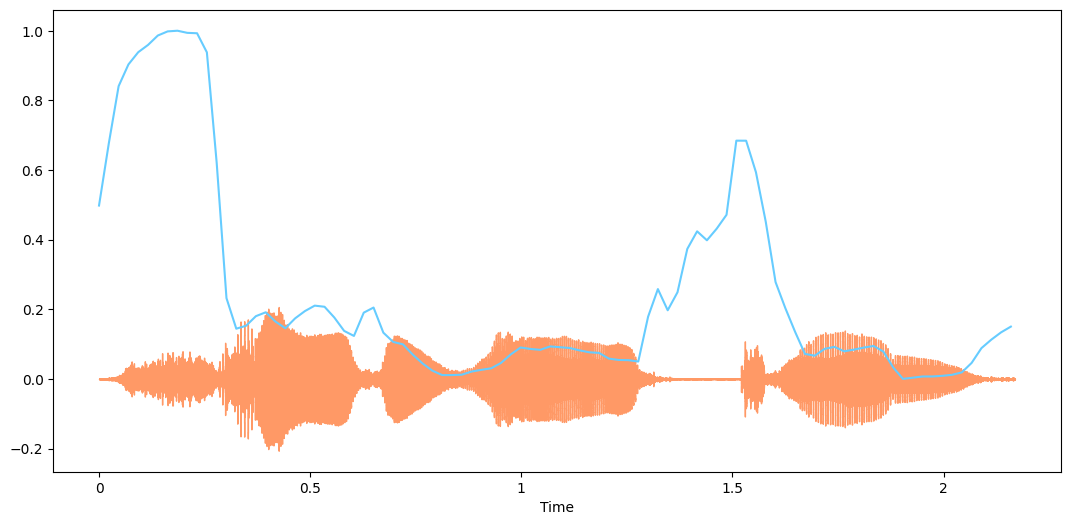

In [34]:
# Plotting the Spectral Centroid along the waveform
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize = (13, 6))
librosa.display.waveshow(audio_file, sr=sr, color = '#ff9966');
plt.plot(t, normalize(spectral_centroids), color='#66ccff');

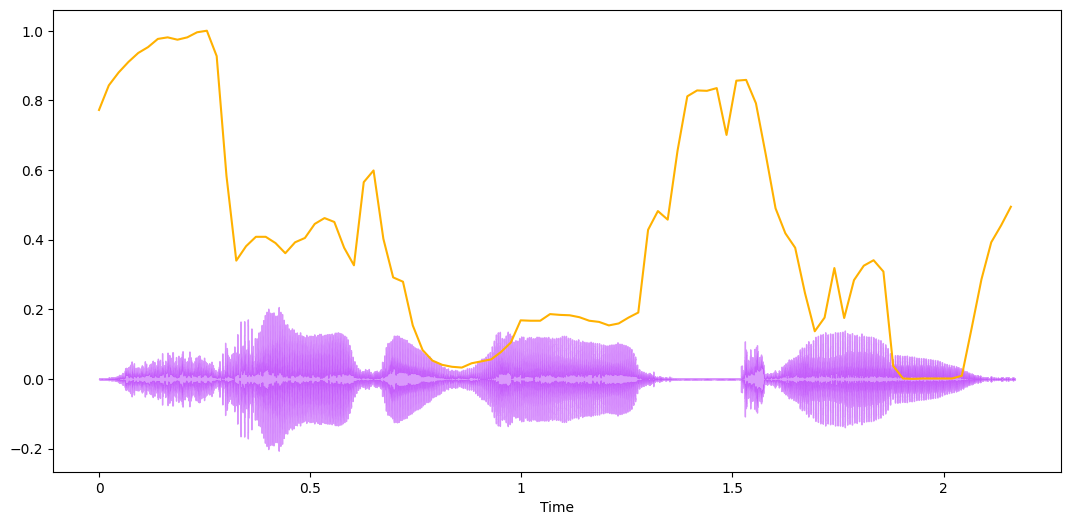

In [35]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (13, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

mfccs shape: (20, 94)


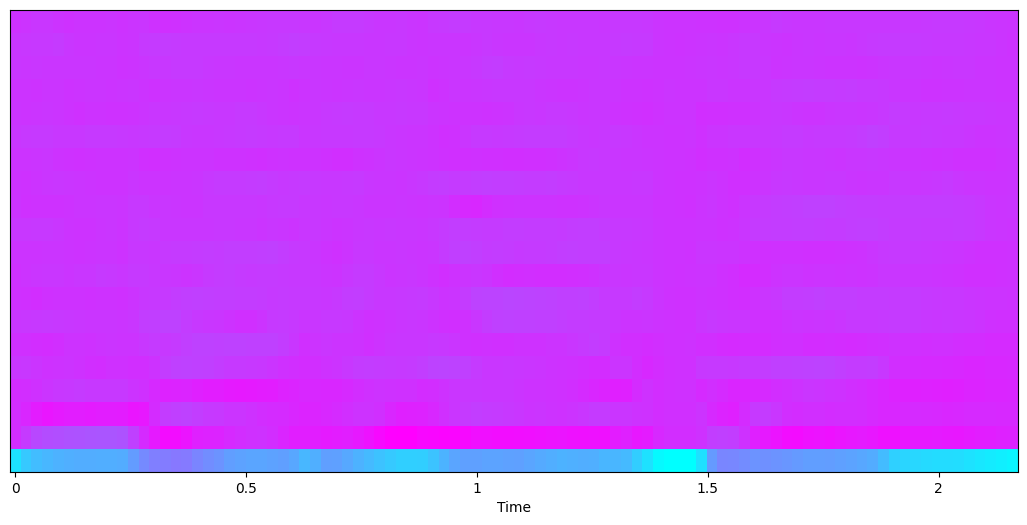

In [36]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

# Displaying  the MFCCs
plt.figure(figsize = (13, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

In [37]:
#Final Functional API for preprocessing
def extract_process(data):

    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))

    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))

    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))

    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))

    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))

    return output_result

In [38]:
def export_process(path):

    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)

    output_1 = extract_process(data)
    result = np.array(output_1)

    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result,output_2))

    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch)
    result = np.vstack((result,output_3))

    return result

In [39]:
X_train, y_train = [],[]
i=0
for path,emotion in zip(Main_Wav_Data.WAV, Main_Wav_Data.EMOTION):

    features = export_process(path)

    for element in features:
        X_train.append(element)
        y_train.append(emotion)
    i=i+1
    print("\r Processed {} files".format(i),end='')

 Processed 2800 files

In [40]:
print(len(X_train))
print(len(y_train))
print(len(Main_Wav_Data.WAV))
print(X_train[0].shape)

8400
8400
2800
(162,)


In [41]:
New_Features_Wav = pd.DataFrame(X_train)
New_Features_Wav['EMOTIONS'] = y_train

#New_Features_Wav.to_csv('New_Wav_Set.csv', index=False)
New_Features_Wav.head(5)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.075675,0.184703,0.261452,0.289275,0.188425,0.221427,0.325537,0.685547,0.894627,0.454526,...,0.000030,0.000019,0.000058,0.000052,0.000038,0.000029,0.000041,0.000024,1.539284e-06,OAF_neutral
1,0.080052,0.218905,0.294707,0.323857,0.224703,0.257272,0.354247,0.694876,0.899341,0.473005,...,0.000048,0.000035,0.000074,0.000067,0.000052,0.000047,0.000057,0.000042,1.779473e-05,OAF_neutral
2,0.073507,0.185778,0.215768,0.278958,0.181299,0.180863,0.303921,0.623031,0.937346,0.511710,...,0.000008,0.000008,0.000004,0.000006,0.000012,0.000009,0.000008,0.000004,3.687702e-07,OAF_neutral
3,0.053653,0.267938,0.363225,0.540738,0.279599,0.220962,0.253094,0.557496,0.922311,0.557948,...,0.000122,0.000113,0.000157,0.000081,0.000114,0.000063,0.000065,0.000027,2.241512e-06,YAF_neutral
4,0.089456,0.298593,0.520210,0.467695,0.249760,0.280532,0.358513,0.820060,0.799401,0.427170,...,0.000197,0.000181,0.000221,0.000144,0.000170,0.000130,0.000128,0.000090,6.403522e-05,YAF_neutral


In [42]:
print(New_Features_Wav['EMOTIONS'].value_counts())

EMOTIONS
OAF_neutral               600
YAF_neutral               600
OAF_Pleasant_surprise     600
YAF_pleasant_surprised    600
YAF_disgust               600
OAF_disgust               600
OAF_Sad                   600
YAF_angry                 600
OAF_Fear                  600
YAF_sad                   600
OAF_angry                 600
OAF_happy                 600
YAF_fear                  600
YAF_happy                 600
Name: count, dtype: int64


In [43]:
encoder_label = OneHotEncoder()
scaler_data = StandardScaler()

In [44]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav['EMOTIONS'].values

print(X.shape)
print(Y.shape)
print(Y)

(8400, 162)
(8400,)
['OAF_neutral' 'OAF_neutral' 'OAF_neutral' ... 'YAF_pleasant_surprised'
 'YAF_pleasant_surprised' 'YAF_pleasant_surprised']


In [45]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(Y.shape)

(8400, 14)


In [46]:
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


In [ ]:
X_train = scaler_data.fit_transform(X_train)
X_test = scaler_data.transform(X_test)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
Model = tf.keras.models.Sequential()
Model.add(tf.keras.layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
Model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(tf.keras.layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(tf.keras.layers.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(tf.keras.layers.Dropout(0.2))

Model.add(tf.keras.layers.Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(tf.keras.layers.Flatten())
Model.add(tf.keras.layers.Dense(units=32, activation='relu'))
Model.add(tf.keras.layers.Dropout(0.3))

Model.add(tf.keras.layers.Dense(units=14, activation='softmax'))

Model.summary()

In [ ]:
EPOCHS = 50
#learning_rate = 1e-4
#decay_rate = learning_rate / EPOCHS
#opt = tf.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)

Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

callbacks = [ModelCheckpoint('model.h5', verbose=1, save_best_only=True), tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=1,
)]

history = Model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=EPOCHS,
                    callbacks=callbacks,
                    validation_data = (X_test, y_test))

In [ ]:
acc = Model.history.history['accuracy']
val_acc = Model.history.history['val_accuracy']
loss = Model.history.history['loss']
val_loss = Model.history.history['val_loss']

epochs   = range(len(acc))

plt.figure(figsize=(15,5))
plt.plot(epochs, acc, 'bo', color = '#ff0066')
plt.plot(epochs, val_acc, color = '#00ccff')
plt.title('Train and Test Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('dice coef')
plt.xlabel('epoch');
#plt.ylim(0.4, 1.0)

plt.figure(figsize=(15,5))
plt.plot (epochs, loss, 'bo', color = '#ff0066')
plt.plot (epochs, val_loss, color = '#00ccff')
plt.legend(['train', 'test'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title ('Training and Validation Loss');
#plt.ylim(0.0, 2.0)

In [ ]:
results = Model.evaluate(X_test, y_test)

In [ ]:
print('Test loss: ', results[0])
print('Test Accuracy: ', results[1]*100)

In [ ]:
prediction_test = Model.predict(X_test)
y_prediction = encoder_label.inverse_transform(prediction_test)

y_test = encoder_label.inverse_transform(y_test)

In [ ]:
print(prediction_test[0:10])

In [ ]:
print(y_prediction[0:10])

In [ ]:
print(y_test[0:10])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_prediction)

plt.figure(figsize=(13,6))
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')


In [ ]:
print(classification_report(y_test, y_prediction))